In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/28.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/31.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/Moderate

In [3]:
import os
import pandas as pd
import numpy as np
from matplotlib import image

import seaborn as sns
import matplotlib.pyplot as plt

from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
import tensorflow as tf
tf.__version__

'2.6.4'

In [5]:
#son objetos
class1 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented'
class2 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented'
class3 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented'
class0 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented'

In [6]:
def file_append(class_path):    
    image_array = []    
    curr_path = os.path.join(os.getcwd(),class_path) # PATH A LA CLASE
    #getcwd() returns current working directory of a process
    cnt = 0
    file_list = [k for k in os.listdir(curr_path) if '.jpg' in k]
    #os.listdir() method in python is used to get the list of all files and directories 
    #in the specified directory. If we don’t specify any directory, then list 
    #of files and directories in the current working directory will be returned.
    for x in file_list: #LISTA DE CLASES
        
        img_path = os.path.join(curr_path,x) #PATH A CADA IMAGEN DE LA CLASE

        img = imread(img_path)
#         img = rgb2gray(img)
        img = resize(img,(60,60,3))     ## Will need to change this resize parameter
    # el 3 representa los colores
        img = img.flatten()
#Flattening is a technique that is used to convert multi-dimensional arrays
#into a 1-D array        
        
        image_array.append(img)
        
    return image_array
    

#creo lista con las imagenes en vectores
class1_img = file_append(class1)
class2_img = file_append(class2)
class3_img = file_append(class3)
class0_img = file_append(class0)

In [7]:
#lo pasa a df
df1 = pd.DataFrame(class1_img)
df1['y']  = 1  #creo columna
df2 = pd.DataFrame(class2_img)
df2['y']  = 2
df3 = pd.DataFrame(class3_img)
df3['y']  = 3
df0 = pd.DataFrame(class0_img)
df0['y']  = 0

df = pd.concat([df0,df1,df2,df3],ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
#frac= Fracción de elementos del eje a devolver.No se puede utilizar con n.


In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [9]:
df.shape #5121 imagenes, 10800 unidades del vector, e y

(5121, 10801)

<AxesSubplot:>

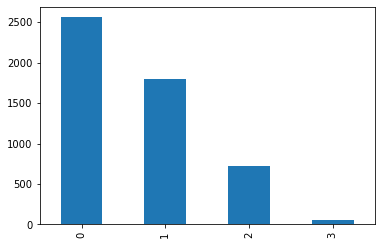

In [10]:
df['y'].value_counts().plot(kind='bar')

Analisis EDA

Text(0.5, 1.0, 'Class Wise Distribution of data')

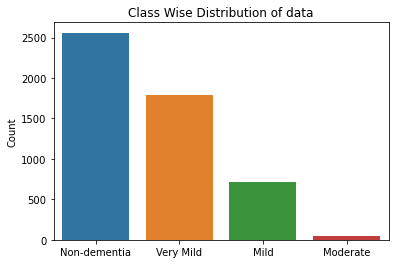

In [11]:

sns.barplot(x =['Non-dementia','Very Mild', 'Mild', 'Moderate'],y = df['y'].value_counts())
plt.ylabel('Count')
plt.title('Class Wise Distribution of data')



Esta distribucion tiene sentido, en la medida que la proporcion con mayor severidad tiene menos casos.


In [12]:
#separamos variables del target
X,y = df[df.columns[:-1]],df['y']

In [13]:
X.shape

(5121, 10800)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
print(y.shape)
y = to_categorical(y, num_classes=4) # One-hot encoding para minimizar error de 10 clases
print(y.shape)

(5121,)
(5121, 4)


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=121)

In [17]:
y_train.shape

(4096, 4)

# Step 4 : Data Preprocessing pipeline for scaling and dimensionality reduction

In [18]:
data_pipe = Pipeline(
    [
        ('scaler', StandardScaler()), 
        ('pca',PCA(n_components=0.9)) #redudir dimencionalidad
    ]
)

In [19]:
data_pipe.fit(X_train)

X_train = data_pipe.transform(X_train)
#al test solo transform
X_test = data_pipe.transform(X_test)

In [20]:
print(f"Original Data dimension: {df.shape[1]} features")
print(f"After PCA Data dimension: {X_train.shape[1]} features")

Original Data dimension: 10801 features
After PCA Data dimension: 383 features


In [21]:
# de la reduccion de la dimensionalidad, obtenemos la varianza explicada por cada dimension
data_pipe.named_steps['pca'].explained_variance_ratio_

array([0.19178499, 0.09665458, 0.06215604, 0.02709632, 0.01960026,
       0.01453467, 0.01188464, 0.0103736 , 0.00922899, 0.0068747 ,
       0.0062263 , 0.00593254, 0.00563048, 0.00512874, 0.00494656,
       0.00473092, 0.00454008, 0.00444766, 0.0043248 , 0.00429966,
       0.00405802, 0.00397781, 0.00381653, 0.00373355, 0.00369802,
       0.00351475, 0.00347366, 0.00337392, 0.0033435 , 0.00327641,
       0.00324167, 0.00312532, 0.00309617, 0.00304761, 0.00298881,
       0.00296348, 0.00293797, 0.00287808, 0.00286392, 0.00281597,
       0.00275128, 0.00271794, 0.00268264, 0.00260645, 0.00256669,
       0.00256405, 0.00250059, 0.00249148, 0.00247389, 0.00245304,
       0.00244313, 0.00241394, 0.00237636, 0.00233792, 0.00232251,
       0.00227107, 0.00225022, 0.00223379, 0.00220526, 0.00219942,
       0.00217032, 0.00213806, 0.0021308 , 0.00210896, 0.00206086,
       0.00202327, 0.00201493, 0.00200239, 0.00197728, 0.00196444,
       0.00195817, 0.00193147, 0.00189587, 0.00189231, 0.00187

Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the PCA method.

In very basic terms, it refers to the amount of variability in a data set that can be attributed to each individual principal component. In other words, it tells us how much of the total variance is “explained” by each component. This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis.

**The explained variance would tell us how much of the variation in housing prices can be explained by the model. In this case, a higher explained variance would be better because it would mean that the model is doing a better job of predicting housing prices.
The concept of Explained variance is useful in assessing how important each component is. In general, the larger the variance explained by a principal component, the more important that component is. 
PCA is a technique used to reduce the dimensionality of data. It does this by finding the directions of maximum variance in the data and projecting the data onto those directions. The amount of variance explained by each direction is called the “explained variance.” Explained variance can be used to choose the number of dimensions to keep in a reduced dataset. It can also be used to assess the quality of a machine learning model. In general, a model with high explained variance will have good predictive power, while a model with low explained variance may not be as accurate.**

Explained variance can be represented as a function of ratio of related eigenvalue and sum of eigenvalues of all eigenvectors:

𝜆𝑖 /(𝜆1+𝜆2+…+𝜆𝑛)

 **These eigenvectors represent the principal components that contain most of the information (variance)**

En palabras simples, el concepto de vectores propios y valores propios se utiliza para determinar un conjunto de variables importantes (en forma de vector) junto con una escala a lo largo de diferentes dimensiones (dimensiones clave basadas en la varianza) para analizar los datos de una mejor manera.

Los vectores propios son los vectores que, cuando se multiplican por una matriz (combinación lineal o transformación), dan como resultado otro vector que tiene la misma dirección pero escalado (por lo tanto, múltiplo del escalador) en dirección hacia adelante o hacia atrás **por una magnitud del múltiplo del escalador** que se puede denominar como valor propio.

**the eigenvalue can be seen as the scaling factor for eigenvectors**

Here is the formula for what is called eigenequation.
𝐴𝑥=𝜆𝑥

In the above equation, the matrix A acts on the vector x and the outcome is another vector Ax having the same direction as the original vector x but scaled/shrunk in forward or reverse direction by a magnitude of scaler multiple, 𝜆. The vector x is called an the eigenvector of A and 𝜆 is called its eigenvalue.
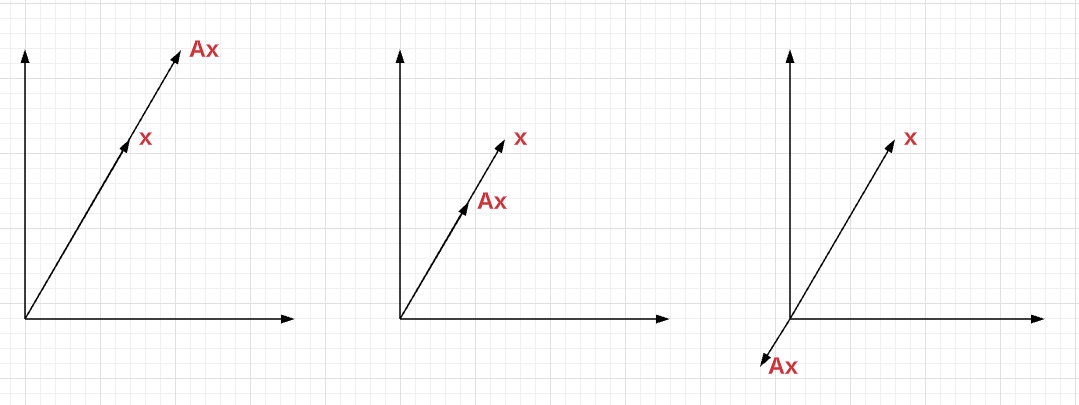
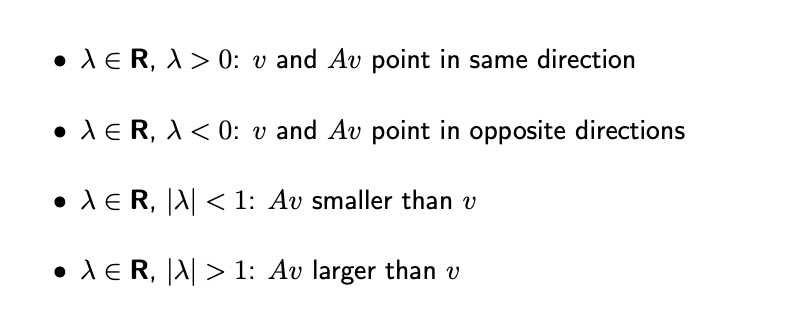

For calculating the eigenvalues, one needs to solve the following equation:

𝐴𝑥=𝜆𝑥

𝐴𝑥–𝜆𝑥=0

(𝐴–𝜆𝐼)𝑥=0

For non-zero eigenvector, the eigenvalues can be determined by solving the following equation:
𝐴–𝜆𝐼=0

In above equation, I is identity matrix and 𝜆 is eigenvalue. Once eigenvalues are determined, eigenvectors are determined by solving the equation (𝐴–𝜆𝐼)𝑥=0

**Eigenvalues can be used as weights in algorithms. By assigning different weights to different features, you can control how much influence each feature has on the final result. When used correctly, eigenvectors and eigenvalues can be extremely valuable tools in machine learning**


In [22]:
top10_var = [x*100 for x in data_pipe.named_steps['pca'].explained_variance_ratio_[:10]]

In [23]:
top10_var #list

[19.17849909929811,
 9.665458428425,
 6.215603848014113,
 2.7096323365844963,
 1.9600260081796206,
 1.4534665665802045,
 1.1884635141124573,
 1.0373602101929205,
 0.9228992120686712,
 0.6874700483056851]

In [24]:
df_top10_var2=pd.DataFrame(data_pipe.named_steps['pca'].explained_variance_ratio_[:10]).apply(lambda x: x*100).reset_index()

In [25]:
df_top10_var2 #df

,index,0
0,0,19.178499
1,1,9.665458
2,2,6.215604
3,3,2.709632
4,4,1.960026
5,5,1.453467
6,6,1.188464
7,7,1.037360
8,8,0.922899
9,9,0.687470


In [26]:
#lista de explained variance.
#This will be used to create step plot
#for visualizing the variance explained by each principal component.
exp_var_pca=data_pipe.named_steps['pca'].explained_variance_ratio_
#array

In [27]:
exp_var_pca

array([0.19178499, 0.09665458, 0.06215604, 0.02709632, 0.01960026,
       0.01453467, 0.01188464, 0.0103736 , 0.00922899, 0.0068747 ,
       0.0062263 , 0.00593254, 0.00563048, 0.00512874, 0.00494656,
       0.00473092, 0.00454008, 0.00444766, 0.0043248 , 0.00429966,
       0.00405802, 0.00397781, 0.00381653, 0.00373355, 0.00369802,
       0.00351475, 0.00347366, 0.00337392, 0.0033435 , 0.00327641,
       0.00324167, 0.00312532, 0.00309617, 0.00304761, 0.00298881,
       0.00296348, 0.00293797, 0.00287808, 0.00286392, 0.00281597,
       0.00275128, 0.00271794, 0.00268264, 0.00260645, 0.00256669,
       0.00256405, 0.00250059, 0.00249148, 0.00247389, 0.00245304,
       0.00244313, 0.00241394, 0.00237636, 0.00233792, 0.00232251,
       0.00227107, 0.00225022, 0.00223379, 0.00220526, 0.00219942,
       0.00217032, 0.00213806, 0.0021308 , 0.00210896, 0.00206086,
       0.00202327, 0.00201493, 0.00200239, 0.00197728, 0.00196444,
       0.00195817, 0.00193147, 0.00189587, 0.00189231, 0.00187

In [28]:
#acumulado de explained variance
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [29]:
df_top10_var2

,index,0
0,0,19.178499
1,1,9.665458
2,2,6.215604
3,3,2.709632
4,4,1.960026
5,5,1.453467
6,6,1.188464
7,7,1.037360
8,8,0.922899
9,9,0.687470


In [30]:
map={
    0:'PC_1', 
    1:'PC_2',
     2:'PC_3',
     3:'PC_4',
     4:'PC_5',
     5:'PC_6',
     6:'PC_7',
     7:'PC_8',
     8:'PC_9',
     9:'PC_10'
     
    
  }

In [31]:
df_top10_var2['index']=df_top10_var2['index'].map(map)

In [32]:
df_top10_var2

,index,0
0,PC_1,19.178499
1,PC_2,9.665458
2,PC_3,6.215604
3,PC_4,2.709632
4,PC_5,1.960026
5,PC_6,1.453467
6,PC_7,1.188464
7,PC_8,1.037360
8,PC_9,0.922899
9,PC_10,0.687470


GRAPH

Text(0.5, 1.0, 'Cumulative explained variance')

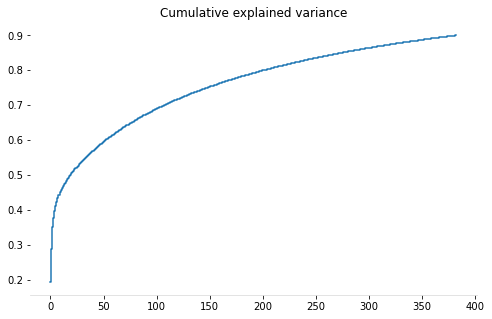

In [33]:
#plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.rcParams['figure.figsize'] = (8, 5)
fig, ax = plt.subplots()
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
#borras lineas de ejes y cuadro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
plt.title('Cumulative explained variance')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  


Text(0.5, 1.0, 'Variance Ratio for top 10 Principal Components')

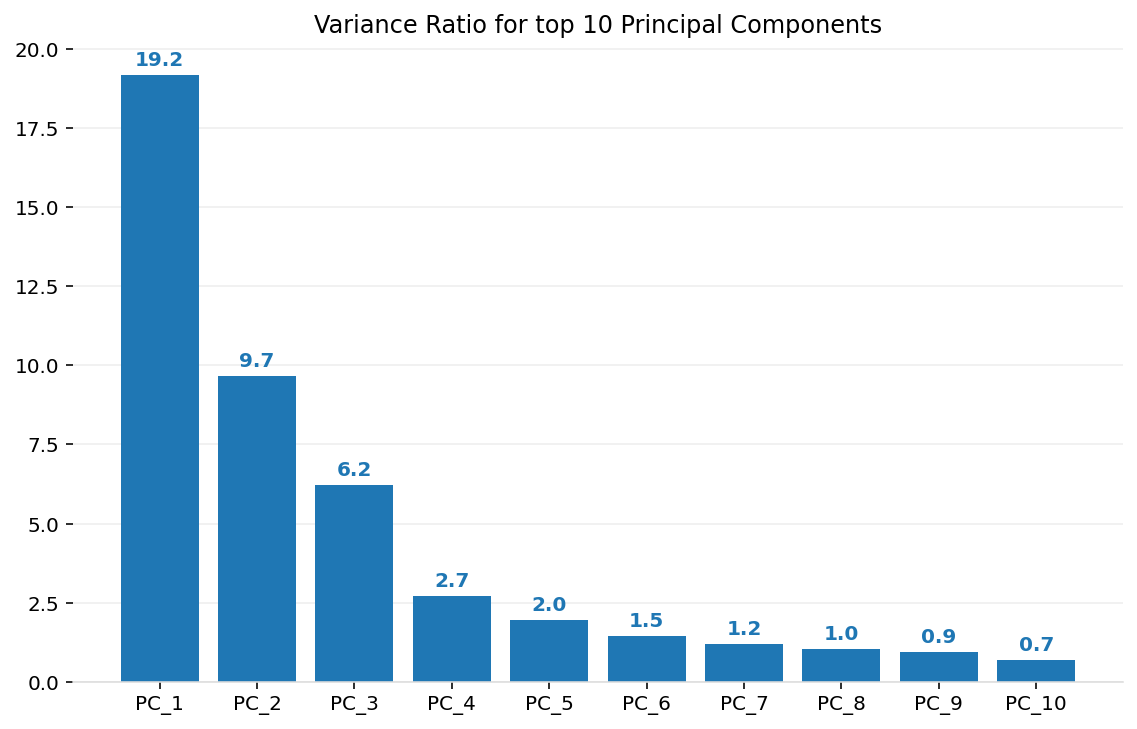

In [34]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

plt.rcParams['figure.figsize'] = (8, 5)
fig, ax = plt.subplots()


bars=plt.bar(
    x=df_top10_var2['index'],
    height=df_top10_var2[0]
)
#borras lineas de ejes y cuadro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')


# pone las lineas horizontales en fx del eje y , pero mantiene las verticales hidden
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )
# Make the chart fill out the figure better.
fig.tight_layout()
plt.title("Variance Ratio for top 10 Principal Components")

                       

ARQUITECTURA DE LA RED NEURONAL

In [35]:
# Voy a necesitar importar una serie de módulos para programar mi red neuronal
from tensorflow.keras.models import Sequential # la tipologia de red q estamos implementando
from tensorflow.keras.layers import Dense, Flatten # de la parte de layers, implementamos metodos dense y flatten
#los tipos de capas q vamos a usar  (flatten alargaba)
# Vamos a codificar la topología de nuestra primera red neuronal!!!



In [36]:
model = Sequential() #creamos variable modelo, le voy metiendo cosas y def modelo. API secuencial
#una capa conectada con la siguiente

model.add(Flatten()) #1) necesito una capa tipo flatten, la primera de todas para estirar los datos.
#Referencio el modelo y agrego.

model.add(Dense(512, input_shape=(383,), activation="relu")) # input_shape= la nueva con la reduccion de dimensionalidad cn PCA
#Le meto la primer capa hidden layer, capa densa (basa en neuronas conectadas), 512 (n de neuronas),
#input_shape --> decirle exactamente la salida de la primer capa (flatten) que le va a entrar.
#en la siguientes no hacen falta.
#activacion: --> fx de activacion, por norma general usamos tipo RELU para las hidden layers.

model.add(Dense(4, activation="softmax")) # Capa salida -> Mismo número de neuronas que de clases objetivo
#capa de salida, tb capa densa, predefinido el n de la capa en fx del problema, aca queremos clasificar las imagenes
#en 4 clases distintas..> 4 neuronas. Aca fx de activacion softmax para problema de clasificacion.

#si le meto capa densa de 1 neurona y activation=linea (como q no hace nada), una neurona sacara rdo sin
#alteracion. No va a ser categorico. Seria de una regresion, sacaria el n que sale de la ultima neurona.
# lo mas facil es no pasarle ninguna fx de activacion.

# Ahí tenemos nuestro primer MLP con una única capa oculta de 512 neuronas

2023-02-11 14:38:03.259669: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [37]:
#Traigamos nuestro optimizador
#tipo de algoritmo por descenso de gradiente q permite optimizar la red neuronal

from tensorflow.keras.optimizers import SGD

# Ahora que tengo definida la arquitectura, la compilo
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.005), metrics=["accuracy"]) 
# sparse_categorical_crossentropy para decimal
#la fx de perdida definida por el problema q resolvemos. En este caso, labels en OHE --> tipo categorical
# si fueran etiquetas tipo decimal --> sparse_categorical_crossentropy
#meto el optimizador, SGD(0.005) rate de aprendizaje
#metrica para evaluar el modelo

In [38]:
# Por fin podemos entrenar nuestra primera red neuronal
print("[INFO]: Entrenando red neuronal...")
# guardo el entrenamiento en H, para plotear la fx de perdida
# al fit le meto: los datos de entrenamiento con sus etiquetas, y luedo dentro de validation data le pongo
#los datos de validacion (IMPRESCINDIBLE), tambien el n de epocas (epoch) y el batch size
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

#Epoch: este es el número de veces que se van a pasar cada ejemplo de entrenamiento por la red.
#batch_size: cada uno toma 128 filas
#usar un Batch Size menor hace que la red neuronal entrene más rápido, ya que el loss 
#converge antes que para Batch Sizes más altos.

#el aprendizaje de la red es más rápido cuanto mayor es el número de neuronas en la capa LSTM, ya que,
#como en el caso anterior, las curvas convergen al valor estable antes.


2023-02-11 14:38:03.394108: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


[INFO]: Entrenando red neuronal...
Epoch 1/50
32/32 [==============================] - 1s 10ms/step - loss: 1.8214 - accuracy: 0.4792 - val_loss: 1.3868 - val_accuracy: 0.5171
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 1.0878 - accuracy: 0.6072 - val_loss: 1.0460 - val_accuracy: 0.5990
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.8007 - accuracy: 0.6870 - val_loss: 0.8563 - val_accuracy: 0.6566
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.7490 - val_loss: 0.7244 - val_accuracy: 0.6966
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.7988 - val_loss: 0.6548 - val_accuracy: 0.7259
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.4227 - accuracy: 0.8381 - val_loss: 0.6247 - val_accuracy: 0.7317
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.8716 - val_loss: 0.5249 - val_a

por cada epoca salen las perdidas (loss) ( viendo prediccion y realidad).
loss: con los datos de entrenaiento.
val_loss: error con los datos de validacion.
accuracy para entrenamiento 
acc para validacion. Acc parecidas.
Y nos da idea de si hay overfitting, Si los acc son distintos,(entrenamiento> val) aprende de memoria el entrenamiento.

Se puede ver que hay overfitting

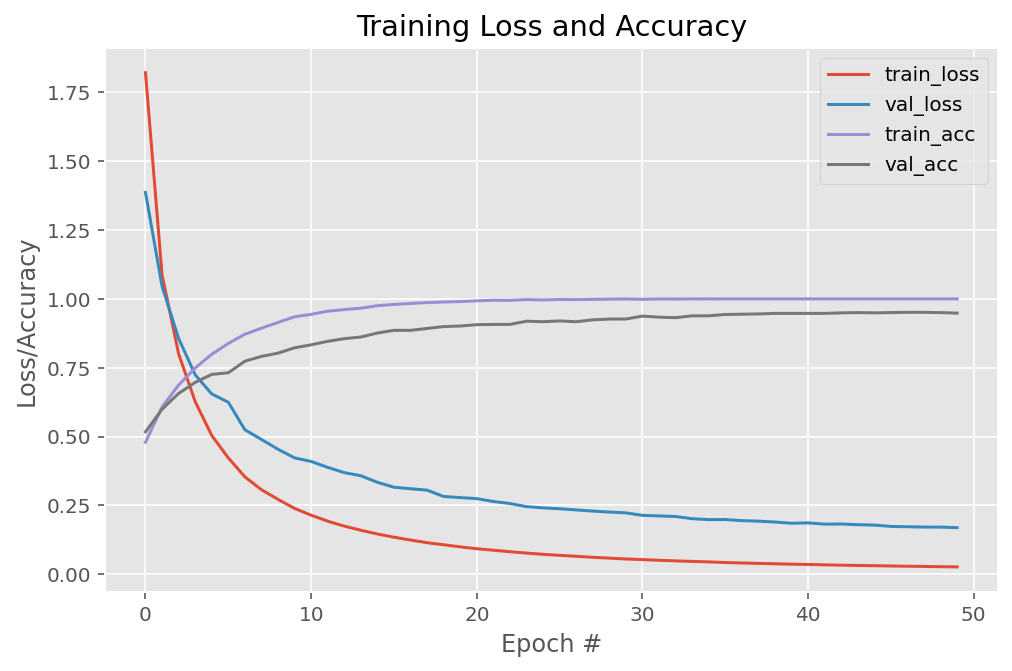

In [39]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [40]:
class1_val = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/VeryMildDemented'
class2_val = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/MildDemented'
class3_val = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented'
class0_val = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented'

In [41]:
#creo lista con las imagenes en vectores de validacion
class1_img_val = file_append(class1_val)
class2_img_val = file_append(class2_val)
class3_img_val = file_append(class3_val)
class0_img_val = file_append(class0_val)

In [42]:
class2_img

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [43]:
df1_val = pd.DataFrame(class1_img_val)
df1_val['y']  = 1  #creo columna
df2_val = pd.DataFrame(class2_img_val)
df2_val['y']  = 2
df3_val = pd.DataFrame(class3_img_val)
df3_val['y']  = 3
df0_val = pd.DataFrame(class0_img_val)
df0_val['y']  = 0

df_val = pd.concat([df0_val,df1_val,df2_val,df3_val],ignore_index=True)
df_val = df_val.sample(frac=1, random_state=42).reset_index(drop=True)
#frac= Fracción de elementos del eje a devolver.No se puede utilizar con n.

In [44]:
df_val.shape

(1279, 10801)

In [45]:
df_val

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [46]:
#separamos variables del target
X_val,y_val = df_val[df_val.columns[:-1]],df_val['y']

In [47]:
X_val.shape

(1279, 10800)

In [48]:
print(y_val.shape)
y_val = to_categorical(y_val, num_classes=4) # One-hot encoding para minimizar error de 10 clases
print(y_val.shape)

(1279,)
(1279, 4)


In [49]:
X_val = data_pipe.transform(X_val)
#al test solo transform


In [50]:
X_val.shape

(1279, 383)

In [51]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")

#método predict de los datos de test, si lo pasamos a nuestro training loop (estamos haciendo el forward pass cn datos de test)
#meto en var para plotear. Aca el batch size no es demasiado importante
predictions = model.predict(X_val, batch_size=128)
print(X_val[0]) #primera muestra que label tiene. ( el n 7). Es la etiqueta real
#y veo la prediccion , prob mas alta en la misma posicion
print(predictions[0])


[INFO]: Evaluando red neuronal...
[ 4.26906530e+01  7.20230013e+01  3.23701195e+01 -2.79869455e+01
 -3.25886517e+01 -1.98153154e-01 -2.63681009e+01  1.64701192e+01
  8.94827706e+00 -4.44265571e+00  1.92210460e+00 -3.29515379e+00
  6.52791194e+00 -1.62297016e+00 -5.37909522e-01 -6.31448884e+00
  1.05156809e+01 -1.30529463e+00  4.00258997e+00  1.01225093e+01
  2.06208166e+00  2.68593837e+00  3.81371958e+00  4.50033261e+00
 -9.86869980e+00  3.08641835e+00 -2.85529892e+00 -6.57165887e-01
  9.26049436e+00  1.06953454e+01 -2.26510178e+00  1.21701713e+00
 -2.66183722e+00  2.02479004e+00 -3.43914975e+00  6.28960913e+00
  3.39361043e-01 -5.98793105e+00  9.93511127e+00 -1.67923431e+00
  3.60088995e+00 -1.63729097e+00 -9.71882100e-01 -1.38328278e+00
  5.62548503e-01 -7.53574805e-01  4.09322506e+00 -3.16391866e+00
  1.38482505e+00  1.22987346e+00 -4.71555605e+00 -2.63979205e-01
  1.15420119e+00  1.23200630e+00 -3.45995631e+00  4.90888467e+00
  4.72516467e+00 -6.07060291e-01 -1.05908878e+00  2.8854

In [52]:
print(classification_report(y_val.argmax(axis=1), predictions.argmax(axis=1))) #classification de sklearn

              precision    recall  f1-score   support

           0       0.66      0.71      0.68       640
           1       0.53      0.56      0.54       448
           2       0.33      0.22      0.26       179
           3       1.00      0.08      0.15        12

    accuracy                           0.58      1279
   macro avg       0.63      0.39      0.41      1279
weighted avg       0.57      0.58      0.57      1279



**PCA**

El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

Supóngase que existe una muestra con 𝑛 individuos cada uno con 𝑝 variables (𝑋1, 𝑋2, ..., 𝑋𝑝), es decir, el espacio muestral tiene 𝑝 dimensiones. PCA permite encontrar un número de factores subyacentes (𝑧<𝑝) que explican aproximadamente lo mismo que las 𝑝 variables originales. Donde antes se necesitaban 𝑝 valores para caracterizar a cada individuo, ahora bastan 𝑧 valores. Cada una de estas 𝑧 nuevas variables recibe el nombre de componente principal.

La librería scikitlearn contiene la clase sklearn.decomposition.PCA que implementa la mayoría de las funcionalidades necesarias para crear y utilizar modelos PCA. Para visualizaciones, Yellowbrick ofrece funcionalidades extra.

Al trabajar con varianzas, **el método PCA es muy sensible a outliers**, por lo que es recomendable estudiar si los hay. La detección de valores atípicos con respecto a una determinada dimensión es algo relativamente sencillo de hacer mediante comprobaciones gráficas. Sin embargo, cuando se trata con múltiples dimensiones el proceso se complica. Por ejemplo, considérese un hombre que mide 2 metros y pesa 50 kg. Ninguno de los dos valores es atípico de forma individual, pero en conjunto se trataría de un caso muy excepcional. 
